### 機器學習概要
機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

f(x)=y
f(x)=y
 
如果是分類, 基本上就是有一筆資料  x=(x1,x2,…,xk)x=(x1,x2,…,xk) , 我們想知道這

f(x)=y
f(x)=y
 
,

其中的  yy  就是某一個類別。

這種學函數的方法, 又可以分為:

supervised learning
unsupervised learning
其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

SVM

In [204]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [205]:
#2 group, x,y
x = np.array([[-2,2],[-1,-6],[1,5],[2,-8]])
y = np.array([1,1,2,2])

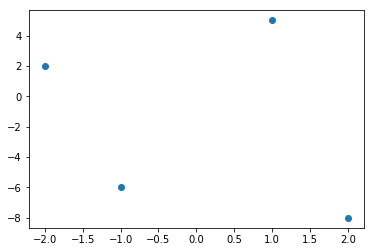

In [206]:
plt.scatter([-2,-1,1,2],[2,-6,5,-8])

In [207]:
x

array([[-2,  2],
       [-1, -6],
       [ 1,  5],
       [ 2, -8]])

In [208]:
x[2,0]

1

In [209]:
x[:,1]

array([ 2, -6,  5, -8])

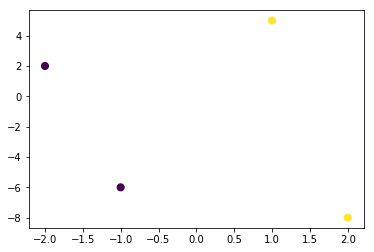

In [210]:
plt.scatter(x[:,0],x[:,1], s=50, c = y) #於是我們就能畫圖, s=50 是設定點的大小, c=y 就是指定顏色, 不同類別不同色。

SVM 支持向量機
支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

In [211]:
from sklearn.svm import SVC

In [212]:
clf = SVC()

In [213]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 預測結果先來看看我們之前用來學的有沒有做對。

In [214]:
clf.predict([[1,3]])

array([2])

In [215]:
clf.predict(x) #結果指出點一點二為群組1,點三點四為群組2

array([1, 1, 2, 2])

### 假設一個虛擬點應該屬於哪一個群組?

In [216]:
clf.predict([[2.5,3]]) #2.5,3 屬於群組1

array([2])

### 視覺化

#### MeshGrid

In [217]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [218]:
X,Y = np.meshgrid(xx,yy)

In [219]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [220]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [221]:
X, Y = np.meshgrid(np.linspace(-5,5,30), np.linspace(-10,10,30))

import pic

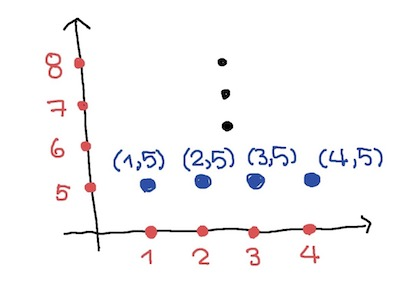

In [222]:
from IPython.display import Image
Image(filename="meshgrid2.jpg", width=400,height=400)

### ravel 拉平法

In [223]:
X = X.ravel()
Y = Y.ravel()

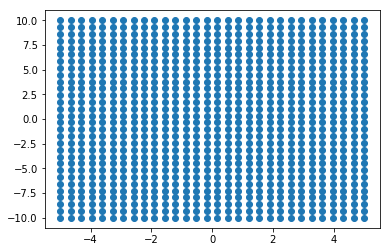

In [224]:
plt.scatter(X,Y)

### zip 高級組合法

In [225]:
xx = [1,2,3,4] 
yy = [5,6,7,8]

In [226]:
list(zip(xx,yy)) #打包為(1,5) (2,6) (3,7) (4,8)

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [227]:
Z = clf.predict(list(zip(X,Y)))

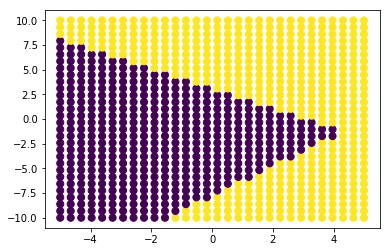

In [228]:
plt.scatter(X,Y, s=50, c = Z) #注意:重點在color = Z, 也就是先前SVM做出的2分類預測